<a href="https://colab.research.google.com/github/fakhrulfaiz/hands_on_machine_learning/blob/main/regression_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import pandas as pd
from google.colab import files

def load_data():
    path = Path("advertising.csv")
    if not path.is_file():
        print(f"{path} not found. Please upload the file.")
        uploaded = files.upload()
        # The uploaded file will be saved in the current directory
        if "advertising.csv" not in uploaded:
            raise FileNotFoundError("advertising.csv was not uploaded")
    return pd.read_csv(path)

In [ ]:
df = load_data()

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.shape

(200, 4)

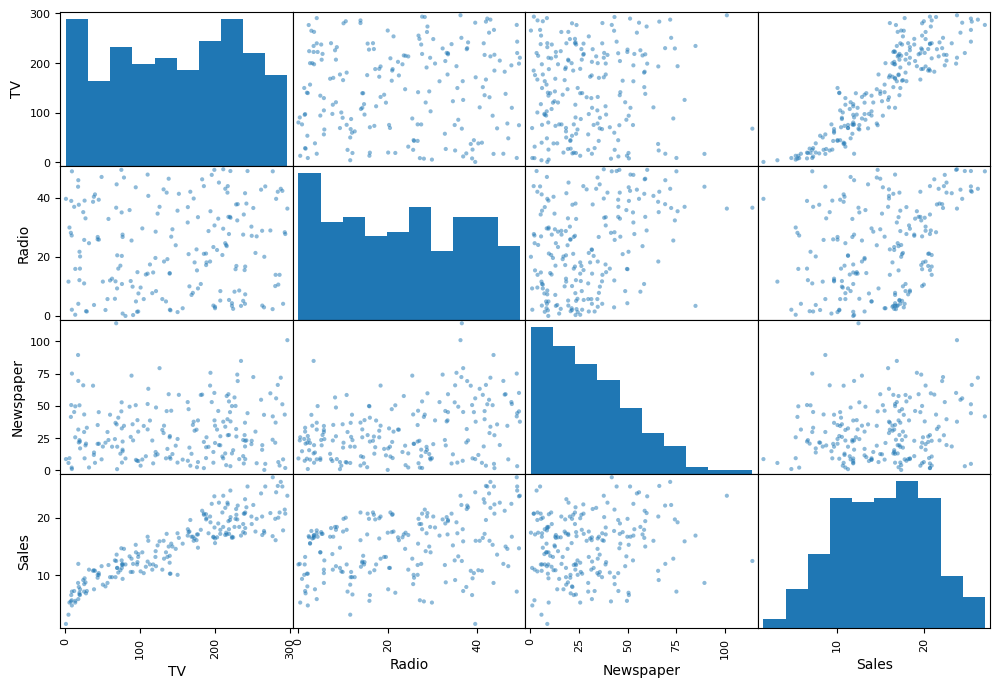

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

attributes = ["TV", "Radio", "Newspaper", "Sales"]
scatter_matrix(df[attributes], figsize=(12, 8))

plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

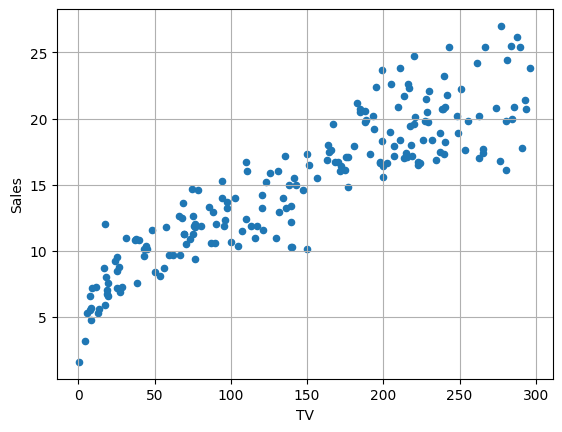

In [ ]:
df.plot(kind="scatter", x="TV", y="Sales", grid=True)

<Axes: xlabel='Newspaper', ylabel='Sales'>

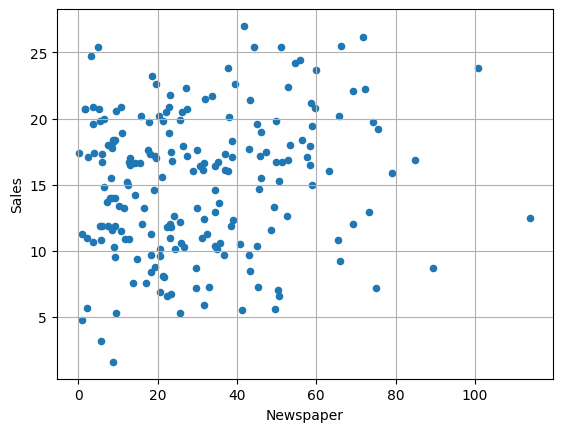

In [ ]:
df.plot(kind="scatter", x="Newspaper", y="Sales", grid=True)

<Axes: xlabel='Radio', ylabel='Sales'>

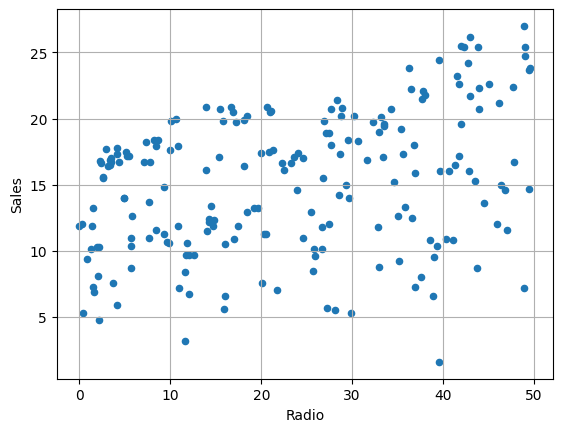

In [ ]:
df.plot(kind="scatter", x="Radio", y="Sales", grid=True)

In [ ]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Task
Perform cross-validation for Linear Regression and Random Forest Regressor models, using `StandardScaler` within a pipeline and `neg_mean_squared_error` as the scoring metric. Then, summarize and compare the mean and standard deviation of the cross-validation scores for both models to determine which performed better.

## Linear Regression Cross-Validation

### Subtask:
Perform cross-validation for the Linear Regression model. This will involve creating a pipeline that first scales the features using StandardScaler and then applies Linear Regression. The cross-validation scores will be calculated using the negative mean squared error metric.


**Reasoning**:
To perform cross-validation for the Linear Regression model, I need to import the necessary modules, create a pipeline that includes StandardScaler and LinearRegression, and then use cross_val_score to evaluate the pipeline with negative mean squared error as the scoring metric.



In [ ]:
from sklearn.model_selection import cross_val_score

# Create a pipeline for Linear Regression with StandardScaler
lin_reg_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Create a pipeline for Random Forest Regressor with StandardScaler
rf_reg_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('rf_reg', RandomForestRegressor(random_state=42))
])


In [ ]:
import numpy as np

models = {
    'Linear Regression': lin_reg_pipeline,
    'Random Forest': rf_reg_pipeline
}

metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']

for model_name, model in models.items():
    print(f"\n{model_name}:")
    print("-" * 50)

    for metric in metrics:
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring=metric)

        if 'neg' in metric:
            scores = -scores
            metric_display = metric.replace('neg_', '').upper()
            if 'squared' in metric:
                metric_display = 'RMSE'
                scores = np.sqrt(scores)
        else:
            metric_display = metric.upper()

        print(f"{metric_display}: {scores.mean():.4f} (+/- {scores.std():.4f})")


Linear Regression:
--------------------------------------------------
R2: 0.8754 (+/- 0.0397)
RMSE: 1.6466 (+/- 0.2977)
MEAN_ABSOLUTE_ERROR: 1.2534 (+/- 0.1996)

Random Forest:
--------------------------------------------------
R2: 0.9143 (+/- 0.0608)
RMSE: 1.2782 (+/- 0.3320)
MEAN_ABSOLUTE_ERROR: 0.9397 (+/- 0.2275)


In [ ]:
print("Training Random Forest Regressor on full training data...")
rf_reg_pipeline.fit(X_train, y_train)

print("Evaluating Random Forest Regressor on the test set...")
y_pred_rf = rf_reg_pipeline.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor Test Set Performance:")
print(f"  RMSE: {rmse_rf:.4f}")
print(f"  R2 Score: {r2_rf:.4f}")

Training Random Forest Regressor on full training data...
Evaluating Random Forest Regressor on the test set...

Random Forest Regressor Test Set Performance:
  RMSE: 1.1987
  R2 Score: 0.9535
